<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->



<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal para IA - clase 3</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

## Tabla de contenidos:
1. [Ejemplo Metodo de Gram-Schmidt](#Ejemplo:-Gram-Schmidt")
2. [Ejemplo l.d. Metodo de Gram-Schmidt](#Ejemplo:-Gram-Schmidt-l.d.")
3. [Ejemplo: Gram-Schmidt comparacion](#Ejemplo:-Gram-Schmidt-comparacion)
4. [Ejemplo: Algoritmo Householder](#Ejemplo:-Algoritmo-Householder)
5. [Algoritmo rotaciones de Givens](#Algoritmo-rotaciones-de-Givens)
6. [Ejemplo: Calculo de valores propios](#Ejemplo:-Calculo-de-valores-propios)
7. [Ejemplo: Calculo de valores propios 2](#Ejemplo:-Calculo-de-valores-propios-2)
8. [Ejemplo: PageRank](#Ejemplo:-PageRank)
9.  [Ejemplo: Calculo de SVD](#Ejemplo:-Calculo-de-SVD)
10. [Ejemplo: Compresion de imagen con SVD](#Ejemplo:-Compresion-de-imagenes-con-SVD-1)
11. [Ejemplo: Compresion de imagen real con SVD](#Ejemplo:-Compresion-de-imagenes-con-SVD-2)
12. [Ejemplo: Compresion de imagen real color con SVD](#Ejemplo:-Compresion-de-imagenes-con-SVD-2-color)
13. [Ejemplo: Analisis de componentes principales - toy problem](#Ejemplo:-Analisis-de-componentes-principales-1)
14. [Ejemplo: Analisis de componentes principales - base de datos cancer de ovarios](#Ejemplo:-Analisis-de-componentes-principales-1)
15. [Ejemplo: Analisis de componentes principales - Eigenfaces](#Ejemplo:-Analisis-de-componentes-principales-1) 



In [34]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import scipy.linalg as LA
import scipy.sparse.linalg as sLA
from scipy.linalg import svd
from PIL import Image
# !pip install threadpoolctl==3.2.0
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplo: Gram Schmidt

**Ejemplo 1.** Sea las matrices
\begin{align*}
A_1 &= \begin{bmatrix}
1/2 & 2 \\ 2 & 1 \end{bmatrix}
\end{align*}

In [2]:
def GramSchmidt_clasico(A):
    m = A.shape[0]; n = A.shape[1];
    R = np.zeros((n,n));
    Q = np.zeros((m,n));
    tol=1e-14
    for j in range(0, n):
        vj = A[:,j];
        for i in range(0,j):
            R[i,j] = np.dot(Q[:,i],A[:,j]);
            vj = vj - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(vj);
        if R[j,j] < tol:
            R[j,j] = 0 
            answer = input("Se encontro un vector l.d. Desea continuar? Y/N")
            if answer=="N":
                break
        else:
            Q[:,j] = (1.0/R[j,j])*vj
    return Q, R

In [3]:
A1 = np.array([[0.5 ,2.0],[2.0, 1.0]],dtype=np.float64)
Q1, R1 = GramSchmidt_clasico(A1)

print("*** Factorizacion A1 = QR: *** \n    Q = \n", Q1, "\n    R = \n", R1)
print("  * Calculamos A1 - QR = \n", A1 - Q1@R1)
print("  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| = ", np.linalg.norm(Q1.T@Q1 - np.eye(2)), "\n")

*** Factorizacion A1 = QR: *** 
    Q = 
 [[ 0.24253563  0.9701425 ]
 [ 0.9701425  -0.24253563]] 
    R = 
 [[2.06155281 1.45521375]
 [0.         1.69774938]]
  * Calculamos A1 - QR = 
 [[0.00000000e+00 2.22044605e-16]
 [0.00000000e+00 0.00000000e+00]]
  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| =  8.368033164341516e-17 



**Ejemplo 2.** Sea la matriz
\begin{equation}
A_2 = \begin{bmatrix}
1 & 1 & 2 \\ 1 & 0 & -2 \\ -1 & 2 & 3 \end{bmatrix}
\end{equation}

In [4]:
A2 = np.array([[1 ,1, 2],[1, 0, -2],[-1,2,3]],dtype=np.float64)
Q2, R2 = GramSchmidt_clasico(A2)

print("*** Factorizacion A2 = QR: *** \n    Q = \n", Q2, "\n    R = \n", R2)
print("  * Calculamos A2 - QR = \n", A2 - Q2@R2)
print("  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| = ", np.linalg.norm(Q2.T@Q2 - np.eye(3)), "\n")

*** Factorizacion A2 = QR: *** 
    Q = 
 [[ 0.57735027  0.6172134   0.53452248]
 [ 0.57735027  0.15430335 -0.80178373]
 [-0.57735027  0.77151675 -0.26726124]] 
    R = 
 [[ 1.73205081 -0.57735027 -1.73205081]
 [ 0.          2.1602469   3.24037035]
 [ 0.          0.          1.87082869]]
  * Calculamos A2 - QR = 
 [[ 0.00000000e+00  0.00000000e+00  2.22044605e-16]
 [ 0.00000000e+00  5.96863333e-18 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00 -4.44089210e-16]]
  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| =  4.563891378090311e-16 



## Ejemplo: Gram Schmidt l.d.

In [5]:
A = np.array([[ 0. , 2. ,-4.,  0., -8.],
              [-2. ,-2., -1. , 3., -2.],
              [-1., -4. , 0. , 1. , 6.],
              [-4. , 0. , 1., -4. , 1.],
              [ 1. ,-2. , 0. , 0. , 5.]], dtype=np.float64) #a5 = a1 - 2*a2 +a3 -a4

Q,R = GramSchmidt_clasico(A)

print("*** Factorizacion A = QR: *** \n    Q = \n", Q, "\n    R = \n", R)
print("  * Calculamos A - QR = \n", A - Q@R)
print("  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| = ", np.linalg.norm(Q.T@Q - np.eye(5)), "\n")
print("  * Chequeamos si Q es ortogonal: Q^T Q = ", Q.T@Q, "\n")

# print(a5)
# R[0,4]*Q[:,0]+R[1,4]*Q[:,1]+R[2,4]*Q[:,2]+R[3,4]*Q[:,3]

Se encontro un vector l.d. Desea continuar? Y/N Y


*** Factorizacion A = QR: *** 
    Q = 
 [[ 0.          0.38951783 -0.87783251 -0.27238815  0.        ]
 [-0.42640143 -0.28328569 -0.36294998  0.68385279  0.        ]
 [-0.21320072 -0.72591959 -0.21101743 -0.23371576  0.        ]
 [-0.85280287  0.21246427  0.21101743 -0.40569981  0.        ]
 [ 0.21320072 -0.44263389 -0.09284767 -0.48880943  0.        ]] 
    R = 
 [[ 4.69041576  1.2792043  -0.42640143  1.91880645 -0.21320072]
 [ 0.          5.13455318 -1.06232135 -2.42563374 -8.90579396]
 [ 0.          0.          4.08529744 -2.14393709  6.22923453]
 [ 0.          0.          0.          3.44064188 -3.44064188]
 [ 0.          0.          0.          0.          0.        ]]
  * Calculamos A - QR = 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.95256482e-17
  -8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00 -2.72951389e-17 -4.44089210e-16
   0.00000000e+00]
 [ 0.00000000e+00  4.77828559e-19  

## Ejemplo: QR linear solver

In [6]:
def sus_reg(U_input,b_input):
    U = U_input.copy()
    b = b_input.copy()
    n = U.shape[0]
    b[n-1] = b[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        b[i] = (b[i] - U[i,(i+1):n].dot(b[(i+1):n]))/U[i,i]
    return b
    
def myQRsolver(A,b):
    Q,R = GramSchmidt_clasico(A)
    x = sus_reg(R, (Q.T).dot(b) )
    return x

In [7]:
A = np.array([[1,3,4,1],[2,1,5,1],[3,1,6,1],[6,2,3,2]],dtype=np.float64)
b = np.array([3,2,1,3], dtype=np.float64)

# Resolver el sistema de ecuaciones lineales para encontrar el flujo
sol = np.linalg.solve(A, b)
x = myQRsolver(A,b)
print(sol,x)

[-0.88888889  0.         -0.11111111  4.33333333] [-8.88888889e-01 -1.34279955e-15 -1.11111111e-01  4.33333333e+00]


## Ejemplo: Gram Schmidt comparacion

Comparacion de algortimos de Gram-Schmidt clasico vs. Gram Schmidt modificado

Resolvemos la factorizacion QR de la siguiente matriz
\begin{equation*}
A = 
\begin{bmatrix}
1 & 1 & \ldots &1 \\
\vdots &\vdots & \ddots &\vdots \\
1 & 1 & \ldots &1
\end{bmatrix}
+\epsilon
I, \quad A\in \mathbb R^{10\times 10}
\end{equation*}

In [8]:
def GramSchmidt_modificado(A):
    m = A.shape[0]; n = A.shape[1];
    R = np.zeros((n,n));
    Q = np.zeros((m,n));
    v = np.zeros((m,n));
    for i in range(0, n):
        v[:,i] = A[:,i];
    for i in range(0, n):
        R[i,i] = np.linalg.norm(v[:,i]);
        Q[:,i] = (1.0/R[i,i])*v[:,i];
        for j in range(i,n):
            R[i,j] = np.dot(Q[:,i],v[:,j]);
            v[:,j]= v[:,j] - R[i,j]*Q[:,i];
    return Q, R

In [9]:
ep = 10**(-7)
A = np.ones((10,10)) + ep*np.eye((10));
#print(A)
Q, R = GramSchmidt_clasico(A)
print("*** Gram-Schmidt clasico.\n")
print("    || A - QR ||2    :", np.linalg.norm(A -np.dot(Q,R)))
print("    || Q.T@Q - I ||2 :", np.linalg.norm(Q.T@ Q-np.eye(10)))
print("    || q1*q2 ||2     :", np.dot(Q[:,1], Q[:,2]))

Q, R = GramSchmidt_modificado(A)
print("\n\n ")
print("*** Gram-Schmidt modified.\n")
print("    || A - QR ||2    :", np.linalg.norm(A -np.dot(Q,R)))
print("    || Q.T@Q - I ||2 :", np.linalg.norm(np.dot(Q.T, Q)-np.eye(10)))
print("    || q1*q2 ||2     :", np.dot(Q[:,1], Q[:,2]))

Q, R = np.linalg.qr(A)

print("\n\n ")
print("*** QR numpy.\n")
print("    || A - QR ||2    :", np.linalg.norm(A -np.dot(Q,R)))
print("    || Q.T@Q - I ||2 :", np.linalg.norm(np.dot(Q.T, Q)-np.eye(10)))
print("    || q1*q2 ||2     :", np.dot(Q[:,1], Q[:,2]))

*** Gram-Schmidt clasico.

    || A - QR ||2    : 9.019494489765868e-16
    || Q.T@Q - I ||2 : 0.3674695563835977
    || q1*q2 ||2     : -0.005948312637853892


 
*** Gram-Schmidt modified.

    || A - QR ||2    : 1.0295784775289034e-15
    || Q.T@Q - I ||2 : 7.830815093173928e-09
    || q1*q2 ||2     : -4.440892098500626e-16


 
*** QR numpy.

    || A - QR ||2    : 1.85775845048325e-15
    || Q.T@Q - I ||2 : 1.3318071099412356e-15
    || q1*q2 ||2     : 1.1102230246251565e-16


## Ejemplo: Algoritmo Householder


In [10]:
def house(x):
    '''
    Compute Householder vector
    Input: x \in \mathbb R^{m}
    Output: Householder vector v, with v[0]=1, and beta such that
            P = I-beta * v * v.T es orthogonal and Px = \|x\|*e_1
    '''
    m = x.size
    if m > 1:
        sigma = x[1:].dot(x[1:])
        v  = x.copy(); v[0] = 1.0
        if sigma == 0:
            beta = 0
        else:
            mu = np.sqrt(x[0]*x[0]+sigma)
            if x[0]<0:
                v[0] = x[0] - mu
            else:
                v[0] = -sigma/(x[0]+mu)
            beta = 2.0 * v[0]*v[0]/(sigma+v[0]**2)
            v = v / v[0]
        return v, beta
    else:
        return np.array([0.0]),0.0

def applyP(v, beta, x):
    # compute Px = (I - beta v v^T )x
    return x - beta * v.dot(x) * v

def Householder_qr(Ain):
    ''' 
    Compute QR decomposition using Householder
    update A in place with QR ... R is upper triangular (at and above diagonal)
    below the diagonal, A holds the "essential" parts of the Householder vectors.
    the essential part gets shorter because they are only applied to the remaining
    bottom right square of A
    Input : A, m\times n matrix
    Output: overwrite A
    '''
    A = Ain.copy()
    m,n = A.shape
    betas = np.empty(n)
    for j in range(n):
        # usando funcion house
        v, betas[j] = house(A[j:, j])
        A[j:,j:] -= betas[j] * np.outer(v, v.dot(A[j:,j:]))
        if j < m:
            A[j+1:,j] = v[1:m-j+1]
    
    R = np.triu(A)
    Q = fullQ_house(A, betas)
    return Q, R

def fullQ_house(A, betas):
    '''
    Take the "packed" Householder vectors stored in A's lower triangle,
    along with the respective \beta s and expand to a full Q matrix 
        (note, R still lives in A's upper triangle)
    '''
    m,n = A.shape
    Q = np.eye(n)
    for j in reversed(range(n)):
        v = A[j:,j].copy()
        v[0] = 1.0
        Q[j:,j:] = (np.eye(n-j) - betas[j] * np.outer(v,v)).dot(Q[j:,j:])
    return Q

In [11]:
def compare(M):
    # compare three QR decomposition: 1) Gram-Schmidt clasico, 2) Gram-Schmidt modificado, 3) Householder
    
    Q, R = GramSchmidt_clasico(M);
    
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("*** Gram-Schmidt clasico.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)
    
    
    Q, R = GramSchmidt_modificado(M);
    
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("\n\n ")
    print("*** Gram-Schmidt modified.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)

    Q, R = Householder_qr(M)
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("\n\n")
    print("*** Householder.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)
    

    Q, R = np.linalg.qr(M)
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("\n\n")
    print("*** Householder numpy qr.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)
    pass

In [12]:
from scipy.linalg import hilbert
H = hilbert(16)
#print(H)
compare(H)

*** Gram-Schmidt clasico.

    ||Q*R-M ||_inf   :  2.220446049250313e-16
    ||Q'*Q - I||_inf :  8.9898295762051


 
*** Gram-Schmidt modified.

    ||Q*R-M ||_inf   :  3.677613769070831e-16
    ||Q'*Q - I||_inf :  1.686092924942988



*** Householder.

    ||Q*R-M ||_inf   :  5.134781488891349e-16
    ||Q'*Q - I||_inf :  2.1531783556771636e-15



*** Householder numpy qr.

    ||Q*R-M ||_inf   :  2.525757381022231e-15
    ||Q'*Q - I||_inf :  1.7117187533665325e-15


## Algoritmo rotaciones de Givens

In [13]:
def Givens(a,b):
    if b == 0:
        c = 1; s = 0
        return c, s
    else:
        if abs(b) > abs(a):
            tau = -a/b; s = 1.0/np.sqrt(1.0+tau*tau); c = s*tau
            return c, s
        else:
            tau = -b/a; c = 1.0/np.sqrt(1.0+tau*tau); s = c*tau
            return c, s

def computeGx(i,k,x):
    y = x.copy()
    (c, s) = Givens(x[i],x[k])  
    print(c,s)
    y[i] = c*x[i] - s*x[k]
    y[k] = s*x[i] + c*x[k]
    return y

def Givens_qr(Ain, plot=True):
    '''
    Compute QR decomposition of A m\times n
    Input :
    Output:
    '''
    A = Ain.copy()
    m, n = A.shape
    if plot:
        fig,ax = plt.subplots(3,4)
        listax = [axi for axi in ax.reshape(-1)]
        
        k= 0 
    for j in range(n):
        for i in reversed(range(j+1,m)):
            (c, s) = Givens(A[i-1,j],A[i,j])  
            A[[i-1,i],j:] = np.array([[c,-s],[s,c]])@A[[i-1,i],j:]
            if plot:
                listax[k].tick_params(left = False, right = False , bottom=False, top = False, labelleft = False , labelbottom = False) 
                listax[k].spy(A,precision=1e-14)
                k+=1
    plt.show()
    return A

0.4472135954999579 -0.8944271909999159
-0.4472135954999579 0.8944271909999159


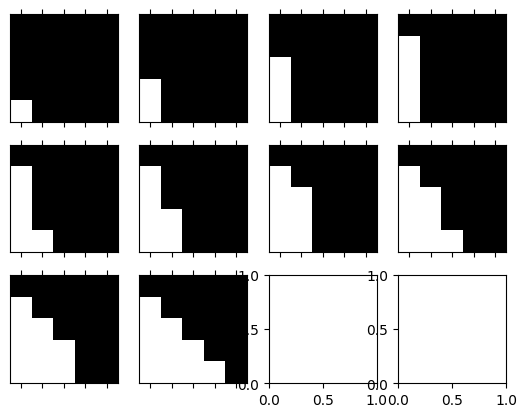

In [14]:
## ejemplo
np.set_printoptions(precision=6)
x = np.array([1.0,2.0,3.0,4.0])
print(1.0/np.sqrt(5.0), -2.0/np.sqrt(5.0))
computeGx(1,3,x)
A = hilbert(5)
newA = Givens_qr(A)


## Ejemplo: Calculo de valores propios

Calculo con funcion general ``scipy.linal.eig`` y para matrices simetricas``scipy.linalg.eigh``

In [18]:
A = np.array([[3,1],[1,3]], dtype=np.float64)
lamb, V = LA.eigh(A);Vinv = np.linalg.inv(V)

lamb1, V1 = LA.eig(A);V1inv = np.linalg.inv(V1)
print(f"chequeando si es diagonalizable: {np.linalg.norm(A - V@(np.diag(lamb))@Vinv) }")
print(f"chequeando si es diagonalizable: {np.linalg.norm(A - V1@(np.diag(lamb1))@V1inv) }")

chequeando si es diagonalizable: 0.0
chequeando si es diagonalizable: 0.0


In [19]:
B = np.array([[1,1],[0,1]])
# B = np.array([[1,1,0],[0,1,1],[0,0,1]], dtype=np.float64)
lamb, V = LA.eig(B)
Vinv = np.linalg.inv(V)
print(f"chequeando si es diagonalizable: {np.linalg.norm(B - V@(np.diag(lamb))@Vinv) }")

print(f"chequeando valore y vector propio: { np.linalg.norm(A.dot(V[:,0] - lamb[0]*V[:,0]))}")



chequeando si es diagonalizable: 1.0
chequeando valore y vector propio: 0.0


## Ejemplo: Calculo de valores propios 2

Calculo par Matrices sparse y grandes ``scipy.sparse.linalg.eigs``y para matrices simetricas ``scipy.sparse.linalg.eigsh``

In [20]:
def Matrizdediferencias(n):
    Dn = np.zeros((n-1,n))
    for i in range(n-1):
        Dn[i,i] = -1.0
        Dn[i,i+1] = 1.0
    return Dn

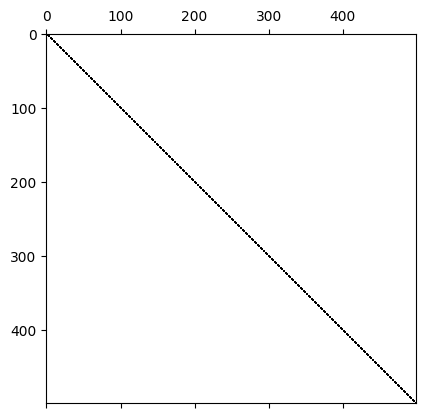

In [21]:
n=501
Dn = Matrizdediferencias(n)
Dnm1 = Matrizdediferencias(n-1)
Delta = -(n-1)**2*Dnm1.dot(Dn)
plt.spy(Delta[:,1:n-1])
plt.show()

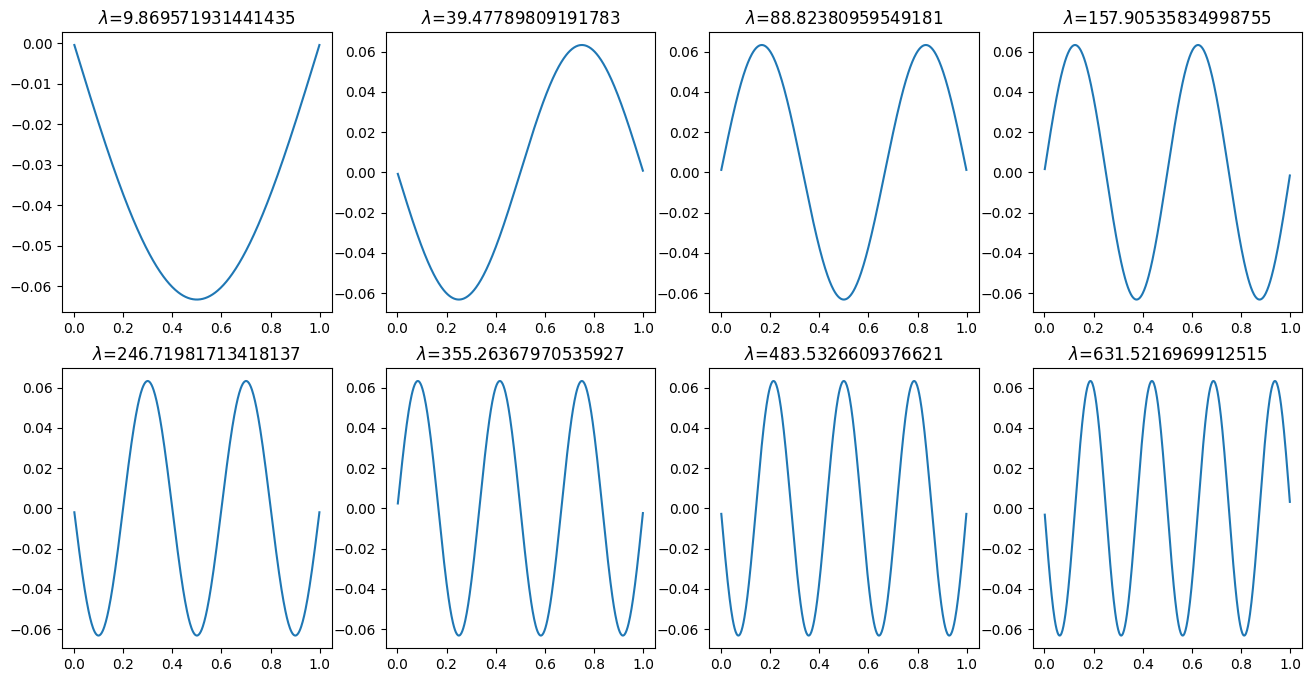

In [22]:
eigenval, V = sLA.eigsh(Delta[:,1:n-1], k=10, which='SM')
t = np.array([ i/(n-1) for i in range(n)])

figplots, axplots = plt.subplots(2,4, figsize=(16,8))
for j, axp in enumerate(figplots.axes):
    axp.plot(t[1:n-1], V[:,j])
    axp.title.set_text(r'$\lambda$=' + str(eigenval[j]))
plt.show()

## Ejemplo: PageRank
$$
A =
\begin{bmatrix}
0 & 0 & 1 & 1/2 \\ 1/3 & 0 & 0 & 0 \\ 1/3 & 1/2 & 0 & 1/2 \\ 1/3 & 1/2 & 0 & 0
\end{bmatrix}
$$

In [23]:
A = np.array([[0,0,1,1/2],[1/3,0,0,0],[1/3,1/2,0,1/2],[1/3,1/2,0,0]])

valores_propios, vectores_propios = sLA.eigs(A)
lam = valores_propios[0].real
x = (vectores_propios[:,0]).real
print("valor propio :", lam)
print("vector propio:", x)

valor propio : 1.000000000000002
vector propio: [0.72101  0.240337 0.540758 0.360505]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


In [24]:
def iteracion_de_potencia(A, x=None, MAXITER=100, TOL=1e-8):
    n = A.shape[0]
    # Inicializamos un vector aleatorio si no es dado
    if x is None: x = np.random.rand(n)
    # Calculamos el autovalor aproximado
    eigenvalue = np.dot(np.dot(A, x), x) / np.dot(x, x)
    Ax = np.dot(A, x)
    
    niter=0
    while niter<MAXITER and np.linalg.norm(Ax - eigenvalue * x) > TOL:
        # Calculamos la norma del vector Ax
        norm = np.linalg.norm(Ax, 2)
        
        # Normalizamos el vector x
        x = Ax / norm
        # Multiplicamos la matriz A por el vector x
        Ax = np.dot(A, x)
        # Calculamos el autovalor aproximado
        eigenvalue = np.dot(np.dot(A, x), x) / np.dot(x, x)
        niter+=1
    return eigenvalue, x, niter

# Ejemplo de uso
A= np.array([[4, -1, 2], [2, 1, 6], [-1, 2, 3]])
eigenvalue, eigenvector, niter = iteracion_de_potencia(A)

print("Autovalor aproximado:", eigenvalue)
print("Vector propio asociado:", eigenvector)


Autovalor aproximado: 5.578020630427786
Vector propio asociado: [0.189821 0.810045 0.554793]


In [25]:
A = np.array([[0,0,1,1/2],[1/3,0,0,0],[1/3,1/2,0,1/2],[1/3,1/2,0,0]])
eigenvalue, eigenvector, niter = iteracion_de_potencia(A, MAXITER=10000)
print("Autovalor aproximado:", eigenvalue)
print("Vector propio asociado:", eigenvector)
print("numero de iteracion :", niter)

Autovalor aproximado: 1.0000000015551949
Vector propio asociado: [0.72101  0.240337 0.540758 0.360505]
numero de iteracion : 30


## Ejemplo: Calculo de SVD

Considere la siguientes matrices y calcule la SVD usando scipy

1. $ \quad A = \begin{bmatrix} 3 & 0 \\ 4 & 5 \end{bmatrix}$

2. $ \quad A = \begin{bmatrix} 1 & 2 & 1 \\ 3 & 1 & 5 \\ 1 & 0 & -1 \\ -1 & 2 & 0 \end{bmatrix} $

3. $ \quad A = \begin{bmatrix} 3 &-4 & 2 & 1 \\ 1 &  4& -1& -2 \\ -5 & 4 &-5 &-4 \end{bmatrix}$


In [28]:
# 1. 
A = np.array([[3,0],[4,5]], dtype=np.float64)
U, s,VT = svd(A);S = np.diag(s)
print(f"U: \n {U}")
print(f"S: \n {S}")
print(f"V: \n {VT.T}")
AK = sum(s[i]*np.outer(U[:,i],VT.T[:,i]) for i in range(2))
print(f"\n *** Chequeamos la descomposiion: \|A-U S V.T\|: {np.linalg.norm(A-AK)}")

U: 
 [[-0.316228 -0.948683]
 [-0.948683  0.316228]]
S: 
 [[6.708204 0.      ]
 [0.       2.236068]]
V: 
 [[-0.707107 -0.707107]
 [-0.707107  0.707107]]

 *** Chequeamos la descomposiion: \|A-U S V.T\|: 1.6764000044290905e-15


In [29]:
# 2. 
A = np.array([[1 , 2 , 1],[3 , 1, 5 ],[1 , 0 , -1],[-1 , 2 , 0] ], dtype=np.float64)
U, s,VT = svd(A); S = np.diag(s)
print(f"U: \n {U}")
print(f"S: \n {S}")
print(f"V: \n {VT.T}")

AK = sum(s[i]*np.outer(U[:,i],VT.T[:,i]) for i in range(3))
print(f"\n *** Chequeamos la descomposiion: \|A-U S V.T\|: {np.linalg.norm(A-AK)}")

U: 
 [[-2.960182e-01 -5.436525e-01  4.449433e-01 -6.471789e-01]
 [-9.537295e-01  1.732820e-01 -9.055097e-02  2.284161e-01]
 [ 5.266012e-02  8.835881e-02  8.628396e-01  4.949015e-01]
 [ 3.918370e-04 -8.164607e-01 -2.221123e-01  5.329709e-01]]
S: 
 [[6.181799 0.       0.      ]
 [0.       2.70519  0.      ]
 [0.       0.       1.570768]]
V: 
 [[-0.502271  0.325675  0.801037]
 [-0.249924 -0.941503  0.226075]
 [-0.827805  0.086648 -0.554284]]

 *** Chequeamos la descomposiion: \|A-U S V.T\|: 2.68125181518049e-15


In [30]:
# 3. 
A = np.random.randint(-5,5, size=(3, 4)) 
print(A)
A = np.array([[ 3, -4,  2,  1],[ 1,  4, -1, -2], [-5,  4, -5, -4]], dtype=np.float64)
U, s,VT = svd(A); S = np.diag(s)
print(f"U: \n {U}")
print(f"S: \n {S}")
print(f"V: \n {VT.T}")

AK = sum(s[i]*np.outer(U[:,i],VT.T[:,i]) for i in range(3))
print(f"\n *** Chequeamos la descomposiion: \|A-U S V.T\|: {np.linalg.norm(A-AK)}")

[[ 2  1  3 -3]
 [ 1  4 -4 -5]
 [ 3 -4 -5 -4]]
U: 
 [[-0.483804  0.082602 -0.871269]
 [ 0.294744 -0.922001 -0.251079]
 [ 0.82405   0.378275 -0.421721]]
S: 
 [[10.816839  0.        0.      ]
 [ 0.        3.698162  0.      ]
 [ 0.        0.        1.821977]]
V: 
 [[-4.878432e-01 -6.937417e-01 -4.150876e-01  3.292928e-01]
 [ 5.926312e-01 -6.774475e-01  4.357213e-01 -5.551115e-17]
 [-4.976135e-01 -2.174513e-01  3.387245e-01 -7.683498e-01]
 [-4.039530e-01  1.118132e-01  7.232669e-01  5.488213e-01]]

 *** Chequeamos la descomposiion: \|A-U S V.T\|: 8.516213916627316e-15


## Ejemplo: Compresion de imagenes con SVD 1

In [31]:
# define matrix
C = np.random.randint(5, size=(10, 10))
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(C, cmap='gray')
x = np.linspace(-.5,9.5,11); y = x;
[X,Y] = np.meshgrid(x,y);
ax.plot(X.T,Y.T,'r');
ax.plot(X,Y,'r');
plt.axis('scaled');
plt.axis([-1, 10, -1, 10]);
plt.axis('off')
plt.tight_layout()


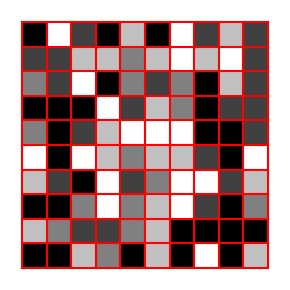

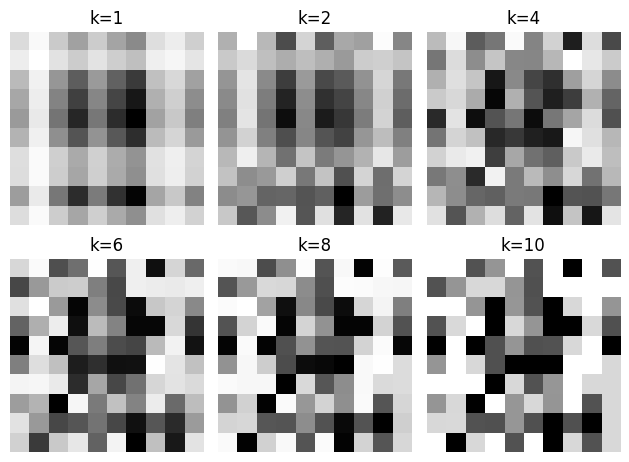

In [32]:
U, sigma, V = np.linalg.svd(C)

fig, axs =plt.subplots(2,3)
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
axs[0,0].imshow(reconstimg, cmap='Greys')
axs[0,0].set_title('k=1')
axs[0,0].axis('off')
reconstimg = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
axs[0,1].imshow(reconstimg, cmap='Greys')
axs[0,1].set_title('k=2')
axs[0,1].axis('off')

reconstimg = np.matrix(U[:, :4]) * np.diag(sigma[:4]) * np.matrix(V[:4, :])
axs[0,2].imshow(reconstimg, cmap='Greys')
axs[0,2].set_title('k=4')
axs[0,2].axis('off')

reconstimg = np.matrix(U[:, :6]) * np.diag(sigma[:6]) * np.matrix(V[:6, :])
axs[1,0].imshow(reconstimg, cmap='Greys')
axs[1,0].set_title('k=6')
axs[1,0].axis('off')

reconstimg = np.matrix(U[:, :8]) * np.diag(sigma[:8]) * np.matrix(V[:8, :])
axs[1,1].imshow(reconstimg, cmap='Greys')
axs[1,1].set_title('k=8')
axs[1,1].axis('off')

reconstimg = np.matrix(U[:, :]) * np.diag(sigma[:]) * np.matrix(V[:, :])

axs[1,2].imshow(reconstimg, cmap='Greys')
axs[1,2].set_title('k=10')
axs[1,2].axis('off')

plt.tight_layout()
# plt.savefig('fig1svdAks.png')
plt.show()

## Ejemplo: Compresion de imagenes con SVD 2

Primero cargamos la imagen en formato matriz y graficamos en escala de grises

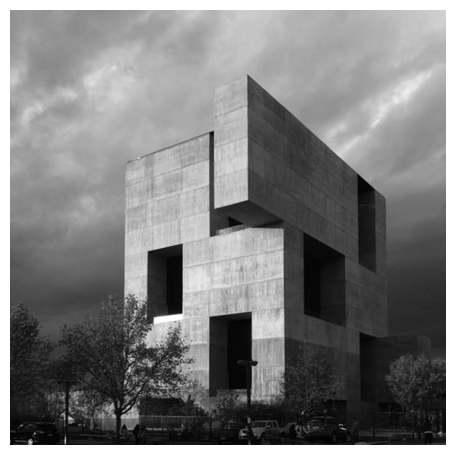

In [36]:
img = Image.open('edif_elemental.png')
imggray = img.convert('LA')
# convert to matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(5,5))
plt.imshow(imgmat, cmap='gray')
plt.tight_layout()
plt.axis('off')
# plt.savefig('fig2svdall.png')
plt.show()

Calculamos la **descomposicion en valores singulares**

In [37]:
U, sigma, V = np.linalg.svd(imgmat)

Graficamos las matrices truncadas aproximaciones de la imagen

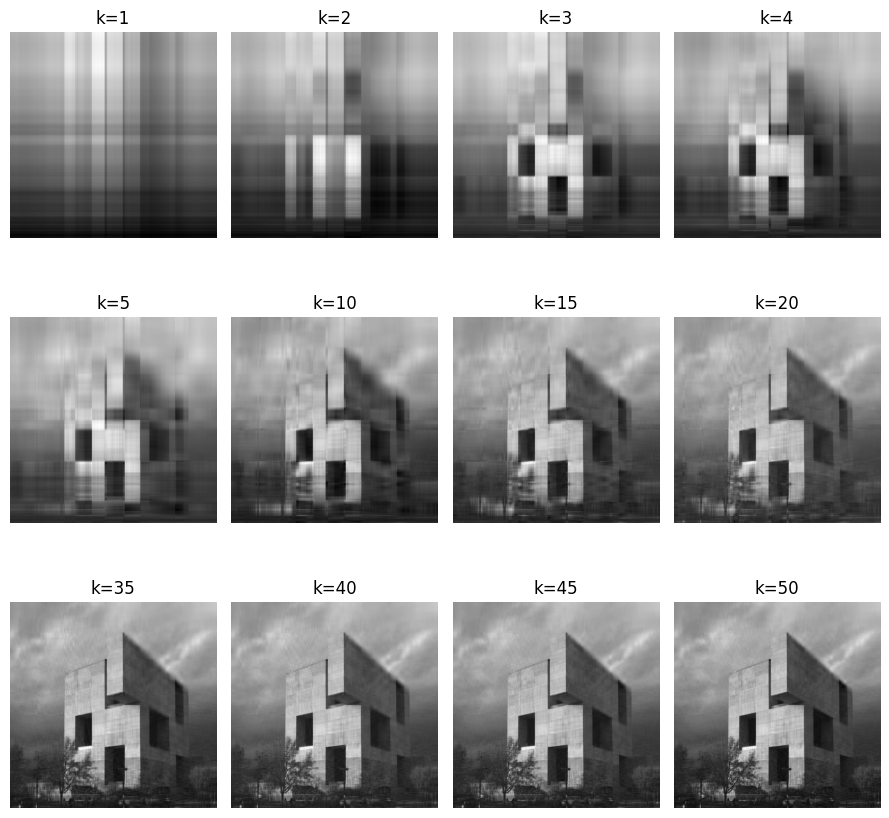

In [39]:
ks = [1,2,3,4,5,10,15,20,35,40,45,50]
fig, axs =plt.subplots(3,4, figsize=(9,9))
for i,ax in enumerate(fig.axes):
    reconstimg = np.matrix(U[:, :ks[i]]) * np.diag(sigma[:ks[i]]) * np.matrix(V[:ks[i], :])
    ax.imshow(reconstimg, cmap='gray')
    ax.set_title(f'k={ks[i]}')
    ax.axis('off')
                                                        
plt.tight_layout()
# plt.savefig('fig2svdAks.png')
plt.show()

## Ejemplo: Compresion de imagenes con SVD 2 color

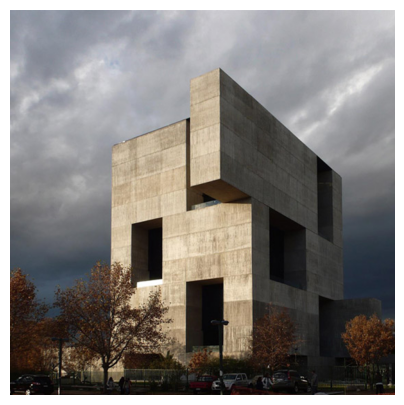

In [40]:
img = Image.open('edif_elemental.png');
imgRGB = img.convert('RGB')
plt.figure(figsize=(5,5))
plt.imshow(imgRGB, interpolation='none')
imgmat = np.array(imgRGB)
plt.imshow(imgmat)
plt.axis('off')
plt.show()

In [41]:
Cred = imgmat[:,:,0]
Cgreen = imgmat[:,:,1]
Cblue = imgmat[:,:,2]

Ured, sigmared, Vred = np.linalg.svd(Cred)
Ugreen, sigmagreen, Vgreen = np.linalg.svd(Cgreen)
Ublue, sigmablue, Vblue = np.linalg.svd(Cblue)

U = np.zeros((Ured.shape[0], Ublue.shape[1],3));
U[:,:,0] = Ured;
U[:,:,1] = Ugreen;
U[:,:,2] = Ublue;

sigma = np.zeros((sigmared.shape[0],3));
sigma[:,0] = sigmared;
sigma[:,1] = sigmagreen;
sigma[:,2] = sigmablue;

V = np.zeros((Vred.shape[0], Vblue.shape[1],3));
V[:,:,0] = Vred;
V[:,:,1] = Vgreen;
V[:,:,2] = Vblue;

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

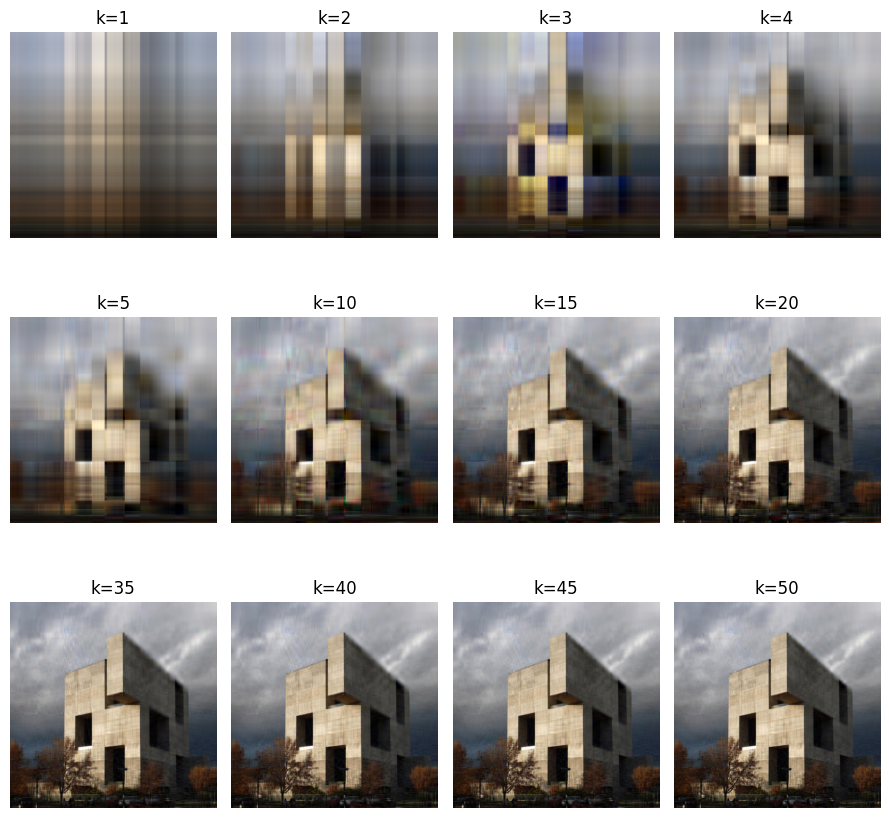

In [42]:
ks = [1,2,3,4,5,10,15,20,35,40,45,50]
fig, axs =plt.subplots(3,4, figsize=(9,9))
for n,ax in enumerate(fig.axes):
    reconstimg = np.zeros(imgmat.shape)
    for i in range(3):
        reconstimg[:,:,i] = (np.trunc(  np.matmul( U[:, :ks[n],i], np.matmul(np.diag(sigma[:ks[n],i]) , (V[:ks[n], :,i]) ) ) ))
    ax.imshow(reconstimg.astype(int))
    ax.set_title(f'k={ks[n]}')
    ax.axis('off')
                                                        
plt.tight_layout()
# plt.savefig('fig2svdAks.png')
plt.show()

## Ejemplo: Analisis de componentes principales 1

En este primer ejemplo creamos datos artificiales provenientes de una Gaussiana en dimension 2.



S: [1.995672 0.495399] varianza en cada una de las direcciones
u1: [-0.501096 -0.865392]
u2: [-0.865392  0.501096]


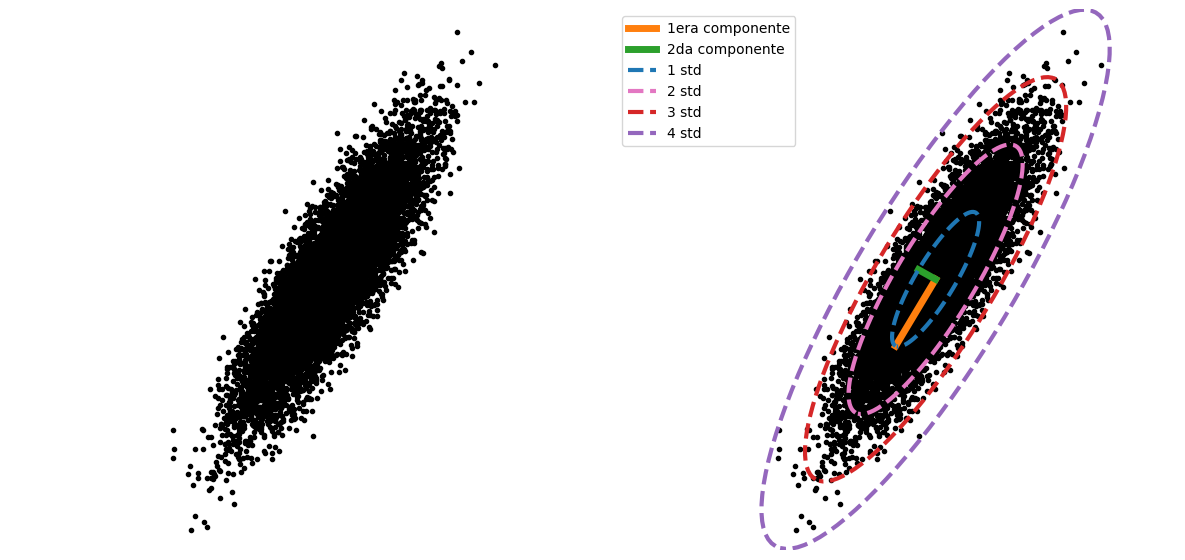

In [43]:
plt.rcParams['figure.figsize'] = [12,6]

xC = np.array([2.0,1.0]) # Este es el centro de nuestros datos o el promedio
sig = np.array([2.0,0.5]) # ejes principales



# Rotacion en angulo theta
theta = np.pi/3.0
c = np.cos(theta); s = np.sin(theta)
R = np.array([[c,-s],[s,c]])

nPoints = 10000

X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
# stretch los puntos, los rotamos en el angulo theta y los centramos en xC

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color = 'k')
ax1.grid()
ax1.axis('off')
plt.xlim((-6,8))
plt.ylim((-6,8))

Xavg = np.mean(X, axis=1)

B = X - np.tile(Xavg,(nPoints,1)).T

U, S, VT = np.linalg.svd((1.0/np.sqrt(nPoints))*B, full_matrices = 0)
print('S:', S, 'varianza en cada una de las direcciones')
print('u1:', U[:,0])
print('u2:', U[:,1])

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

phi = 2 * np.pi * np.arange(0,1,0.01)

# Intervalos de confianza
# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(phi),np.sin(phi)])

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='C01',linewidth=5, label='1era componente')
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='C02',linewidth=5, label='2da componente')

ax2.plot(Xavg[0] + 1*Xstd[0,:], Xavg[1] + 1*Xstd[1,:],'--',color='C0',  linewidth=3, label='1 std')
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'--',color='C06',linewidth=3, label='2 std')
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'--',color='C03',linewidth=3, label='3 std')
ax2.plot(Xavg[0] + 4*Xstd[0,:], Xavg[1] + 4*Xstd[1,:],'--',color='C04',linewidth=3, label='4 std')
ax2.legend()
plt.tight_layout()
ax2.axis('off')
# plt.savefig('pcageo.png')
plt.show()

## Ejemplo: Analisis de componentes principales 2

 
###  Base de datos de cancer de ovarios - Eigen-genetic sequences

Visualizacion de datos en alta dimension en baja dimension y clasificacion de datos

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# load dataset:  216 pacientes, 4000 marcadores geneticos
obs = np.loadtxt(os.path.join('DATA','ovariancancer_obs.csv'),delimiter=',')
f = open(os.path.join('DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")
print("(m,n):", obs.shape)
# la primera mitad de los pacientes tiene cancer de ovarios y la segunda no
# queremos obtener factores key que diferencian los pacientes

# Calcular la SVD
U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
plt.title('singular values')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
plt.title('singular values suma acumulada')
plt.show()

FileNotFoundError: DATA/ovariancancer_obs.csv not found.

In [45]:
# proyectamos en las componetes principales PC1, PC2, PC3 y visualizamos
#%matplotlib notebook
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

PC1 = 0
PC2 = 1
PC3 = 2
for j in range(obs.shape[0]):
    x = VT[PC1,:] @ obs[j,:].T
    y = VT[PC2,:] @ obs[j,:].T
    z = VT[PC3,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='C01',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='C00',s=50)

ax.view_init(25,20)
plt.show()

NameError: name 'obs' is not defined

## Ejemplo: Analisis de componentes principales 3

### Eigenfaces
    

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
print("Dimension de cada imagen: m,n :", m,n)
nfaces = np.ndarray.flatten(mat_contents['nfaces'])
print("Numero de imegenes por persona/numero de caras: ", nfaces)
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'DATA/allFaces.mat'

In [47]:
# Muestra todas el conjunto de todas las imagenes
print("Todas las imagenes separadas por persona")
for person in range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    count = 0
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
    img = plt.imshow(allFaces)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

Todas las imagenes separadas por persona


NameError: name 'nfaces' is not defined

In [48]:
plt.rcParams['figure.figsize'] = [8, 8]

# Usamos para entrenar las imagenes asociadas a las primeras 36 personas
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Preprocesamos los datos substrayendo la media y luego calculamos la SVD
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T # mean centered data base
U, S, VT = np.linalg.svd(X,full_matrices=0)


NameError: name 'faces' is not defined

In [49]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.title(' Rostro/cara promedio')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')
plt.title('primer eigenface')
plt.show()

NameError: name 'avgFace' is not defined

In [50]:
# cara 1
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.1)
plt.suptitle("Representacion de cara 1", fontsize=18, y=0.95)

#ax1 = fig1.add_subplot(241)
cara1 = faces[:,np.sum(nfaces[:0])] # First face of person 1
ax = plt.subplot(2, 4, 1)
img = ax.imshow(np.reshape(cara1,(m,n)).T)
ax.set_title('Imagen original')
img.set_cmap('gray')
ax.axis('off')

# proyectamos en
cara1MS = cara1 - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]


for ii, r in enumerate(r_list):
    # Observe que U.T U  = P es una proyeccion!
    reconFace = avgFace + (U[:,:r]).dot((U[:,:r].T).dot(cara1MS))
    ax = plt.subplot(2, 4, ii + 2)
    img = ax.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.show()

NameError: name 'faces' is not defined

In [51]:
# Ahora proyectamos una cara/rostro nuevo usando los datos de entrenamiento
# cara X
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.1)
plt.suptitle("Representacion de cara 1", fontsize=18, y=0.95)
testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37
ax = plt.subplot(2, 4, 1)
img = ax.imshow(np.reshape(testFace,(m,n)).T)
img.set_cmap('gray')
ax.set_title('Imagen original')
ax.axis('off')


testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]

for ii, r in enumerate(r_list):
    reconFace = avgFace + (U[:,:r]).dot((U[:,:r].T).dot(testFaceMS))
    ax = plt.subplot(2, 4, ii + 2)
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.show()

NameError: name 'faces' is not defined

In [52]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [1, 2] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Person 7')

plt.legend()
plt.show()

NameError: name 'faces' is not defined